## Exploratory Data Analysis:
I plotted label vs frequency graphs and most frequent words.<br>
We can see that the data is very imbalanced. <br><br><br>
## Feature Extraction:
1. **Orthographic Vector:** <br>
It basically checks on each position of the string, what character is present. <br>
'x' - > ASCII characters, <br>
'c' -> Small letters, <br>
'C' -> Capital letters, <br>
'n' -> Numbers, <br>
'p' -> Punctuations<br><br>
For example [['Hi, my name is Devashish'], ['How are you?']] will return [['CcpxccxccccxccxCcccccccc'], ['Cccxcccxcccp']]<br><br>
Then after getting the mapping, it creates a vector for it.
[[2, 1, 4, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 4]]<br>
'x' -> 0, <br>
'c' -> 1,<br>
'C' -> 2,<br>
'n' -> 3,<br>
'p' -> 4,<br><br>
The max length of this vector is 20 and it replaces characters from ortho mapping with numbers on that position of the string.<br><br>

2. **Pos Tag: **<br>
Position of Speech Tags.<br>
For this I am using nltk.pos_tag.<br><br>
Here are the definitions of each tags:<br>
CC -> coordinating conjunction<br>
CD -> cardinal digit<br>
DT -> determiner<br>
EX -> existential there (like: “there is” … think of it like “there exists”)<br>
FW -> foreign word<br>
IN -> preposition/subordinating conjunction<br>
JJ -> adjective ‘big’<br>
JJR -> adjective, comparative ‘bigger’<br>
JJS -> adjective, superlative ‘biggest’<br>
LS -> list marker 1)<br>
MD -> modal could, will<br>
NN -> noun, singular ‘desk’<br>
NNS -> noun plural ‘desks’<br>
NNP -> proper noun, singular ‘Harrison’<br>
NNPS -> proper noun, plural ‘Americans’<br>
PDT -> predeterminer ‘all the kids’<br>
POS -> possessive ending parent’s<br>
PRP -> personal pronoun I, he, she<br>
PRP -> possessive pronoun my, his, hers <br>
RB -> adverb very, silently, <br>
RBR -> adverb, comparative better <br>
RBS -> adverb, superlative best<br>
RP -> particle give up TO, to go ‘to’ the store.<br>
UH -> interjection, errrrrrrrm<br>
VB -> verb, base form take<br>
VBD -> verb, past tense took<br>
VBG -> verb, gerund/present participle taking<br>
VBN -> verb, past participle taken<br>
VBP -> verb, sing. present, non-3d take<br>
VBZ -> verb, 3rd person sing. present takes<br>
WDT -> wh-determiner which<br>
WP -> possessive wh-pronoun whose<br>
WRB -> wh-abverb where, when<br><br>

## Solutions:
1. **Method 1: Normal Classification:**<br>
I am using support vector classification for this.<br>
Evaluation: Recall is very low and we have many false negatives<br><br>
2. **Method 2: Downsampled Classification:**<br>
Since we are dealing with imbalanced data, I have downsampled the class with label('O') and am using support vector classification for this.<br>
Evaluation: Accuracy is very less.<br><br>
3. **Method 3: Upsampled Classification:**<br>
Since we are dealing with imbalanced data, I have upsampled the minority and am using naive bayes classification because the number of samples increases for this.<br>
Evaluation: Accuracy is very less.<br><br>
4. **Method 4: Penalized Classification:**<br>
Since we are dealing with imbalanced data, I tried penalizing the training model. I used SVC for this with class_weight='balanced'. But it took forever to run so I decided to skip this.<br>
Evaluation: Too much time.<br><br>
5. **Method 5: Random Forest:**<br>
Since the data in imbalanced, random forest is a good algorithm for this.<br>
Evaluation: It performed better than all the other models till now. It was able to classify other labels also.<br><br>
6. **Method 6: Reading text as tweets:**<br>
For this, I refered to http://noisy-text.github.io/2017/pdf/WNUT19.pdf.<br>
I have implemented a multi task neural network that aims at generating named entities in user generated text. <br>
The model captures some orthographic features at the character level by using convulation neural network, PoS features by using Bidirectional Long-Short Term Memory.Once the network is trained, I used it as a feature extractor to feed a Conditional Random Fields (CRF) classifier.
<br><br>
For example: Lets consider the two texts 'Hi Paris' and 'Welcome to Paris'. <br>
Here in the first text, 'Paris' can be reffered as Name entity and in the second text, 'Paris' can be reffered as Location entitity. <br>
This gave me an idea that the outputs from the previous word/layer makes difference in identifying the entity.
<br>
Evaluation: It performed decent and as it made the most sense, I decided to go with this.<br><br><br>


## Evaluation: 
For evaluation, since this is very imbalanced data, I have used confusion matrix to check false negatives. I have also used accuracy for some cases.<br>
**All the models had many false negatives. For future improvement, I should extract some more features. ** <br><br>


## Bonus:
For bonus, I clustered the predicted labels based on their probabilities. I used KMeans clustering.


## Some more insights:
Top likely transitions:<br>
B-person -> I-person 3.936851<br>
B-location -> I-location 2.291192<br>
I-product -> I-product 1.705511<br>
O      -> O       1.632621<br>
B-creative-work -> I-creative-work 1.417550<br>
I-creative-work -> I-creative-work 1.386468<br>
B-group -> I-group 1.333125<br>
B-product -> I-product 1.057185<br>
I-location -> I-location 0.951327<br>
I-group -> I-group 0.726022<br>
O      -> B-person 0.531396<br>
B-corporation -> I-corporation 0.516798<br>
O      -> B-location 0.494253<br>
O      -> B-group 0.371175<br>
O      -> B-corporation 0.290107<br>
<br><br>
Top unlikely transitions:<br>
B-location -> B-person -0.140064<br>
B-person -> B-location -0.142025<br>
B-group -> O       -0.152444<br>
B-person -> B-person -0.153057<br>
I-group -> O       -0.157578<br>
I-creative-work -> O       -0.238135<br>
I-product -> O       -0.587993<br>
B-product -> O       -0.602447<br>
B-creative-work -> O       -1.781312<br>
O      -> I-corporation -2.033485<br>
O      -> I-group -2.725038<br>
O      -> I-product -3.081457<br>
O      -> I-creative-work -3.115185<br>
O      -> I-location -3.260909<br>
O      -> I-person -3.946296<br>

#  

#  

In [1]:
import warnings
warnings.filterwarnings('ignore')

import csv
import re
import string
import sys
from collections import Counter
from collections import defaultdict as ddict
from itertools import groupby

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycrfsuite as crf
import seaborn as sn
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import RandomUniform
from keras.layers import (LSTM, Bidirectional, Conv1D, Dense, Dropout,
                          Embedding, Flatten, Input)
from keras.layers.merge import concatenate
from keras.layers.pooling import GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import Adamax
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk import pos_tag, word_tokenize
from nltk.probability import FreqDist
from pycrfsuite import ItemSequence
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.utils import resample


Using TensorFlow backend.


In [2]:
seed_number = 1337
np.random.seed(seed_number)
experiment = 'notebook'

#  

# Exploratory Data Analysis

### Reading the text file

In [3]:
# Use quoting because the file has " as text
df = pd.read_csv('train.txt', sep='\t', header=None, quoting=csv.QUOTE_NONE)
df.columns = ['text', 'label']
df = df.dropna()
df = df.reset_index(drop=True)

# Creating a new column 'labels' for changing label to integer classes
labels_set = set(df['label'])
labels_hash = {k: v for v, k in enumerate(list(labels_set))}
df['labels'] = df['label'].map(labels_hash)

### Checking the counts of each classes

In [4]:
df.groupby('label').count()

,text,labels
label,,
B-corporation,221,221
B-creative-work,140,140
B-group,264,264
B-location,548,548
B-person,660,660
B-product,142,142
I-corporation,46,46
I-creative-work,206,206
I-group,150,150


### Plotting the classes on a bar chart

Text(0,0.5,'Frequency')

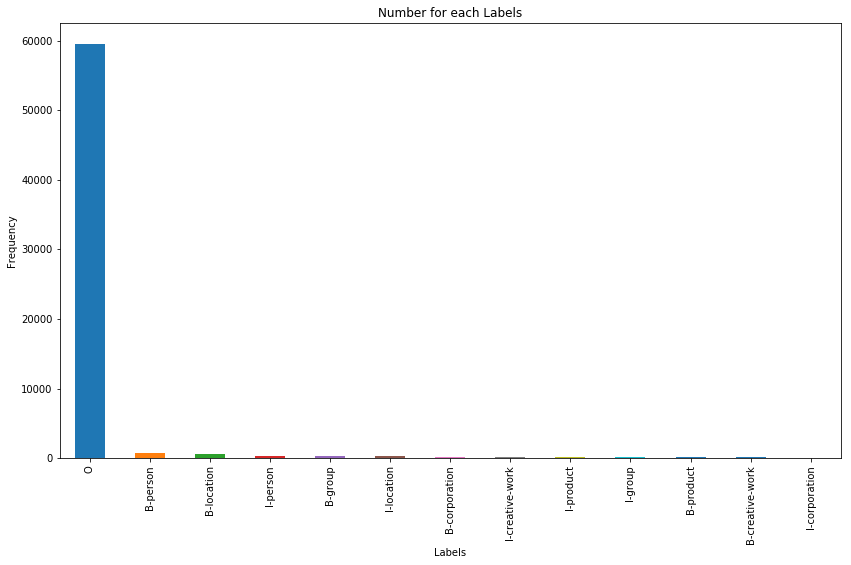

In [5]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

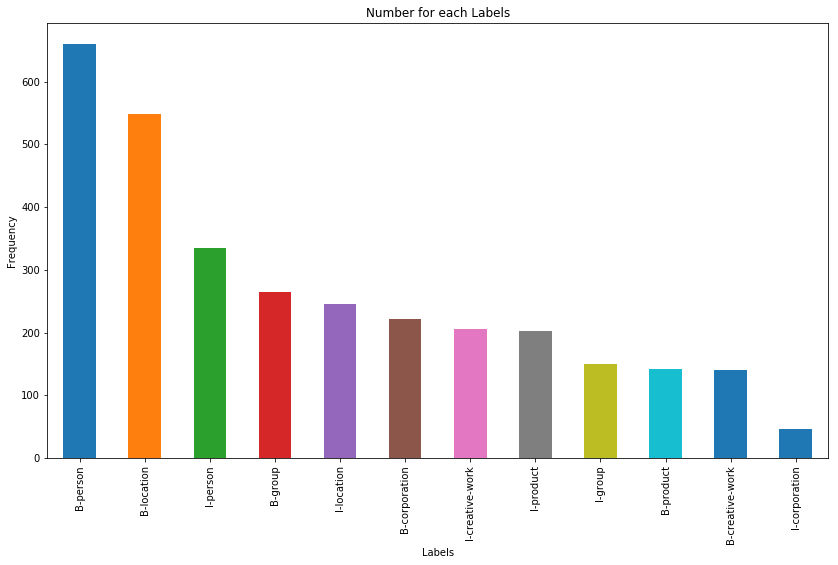

In [6]:
ax = df[df['label']!='O']['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

### We can see the data is pretty imbalanced. Most of the labels are 'O'

### Plotting the most frequent words

[('.', 1936), (',', 1274), (':', 1163), ('the', 1114), ('to', 1055), ('I', 876), ('a', 851), ('!', 821), ('RT', 690), ('and', 609), ('you', 577), ('in', 564), ('...', 543), ('for', 534), ('on', 498), ('it', 478), ('of', 461), ("'s", 451), ('is', 417), ('at', 394), ('my', 366), ('?', 335), ('be', 323), ('when', 300), ('day', 280), ('i', 274), ('"', 263), ('time', 261), ('that', 257), ('me', 240)]


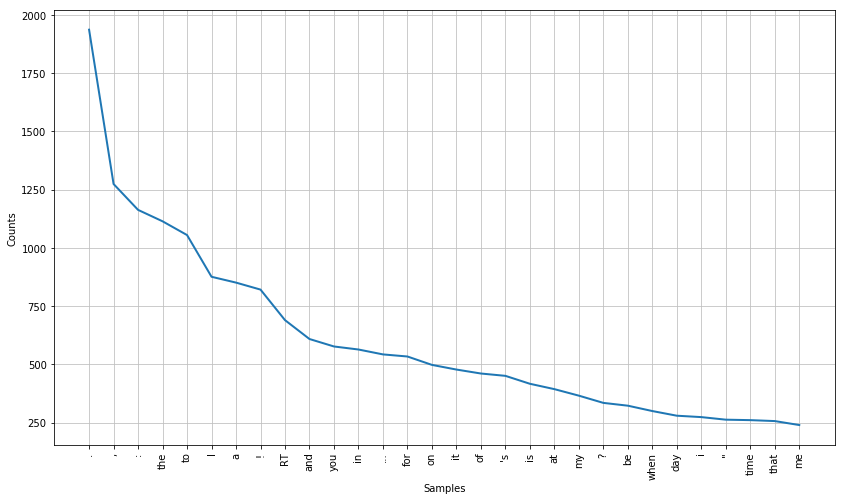

In [7]:
fdist = FreqDist(df['text'])

print(fdist.most_common(30))
plt.figure(figsize=(14,8))
fdist.plot(30,cumulative=False, )
plt.show()

#  

#  

#  

# Extracting Features

### Feature 1: Orthographic Vector

In [8]:
def orthigraphic_char(ch):
    try:
        if re.match('[a-z]', ch):
            return 'c'
        if re.match('[A-Z]', ch):
            return 'C'
        if re.match('[0-9]', ch):
            return 'n'
        if ch in string.punctuation:
            return 'p'
    except TypeError:
        print('TypeError:',ch)
    return 'x'
    
def orthographic_tweet(tweet):
    return [''.join([orthigraphic_char(ch) for ch in token]) for token in tweet]
    
def orthographic_mapping(tweets):
    return [orthographic_tweet(tweet) for tweet in tweets]

In [9]:
# Create the mapping first
df['ortho_mapping'] = orthographic_mapping(df['text'])

In [10]:
# Creating the vector
ortho_max_length = 20

index2ortho = ['x', 'c', 'C', 'n', 'p']
ortho2index = ddict(lambda: 0, {o:i for i,o in enumerate(index2ortho)})

def encode_tokens(token2index, tokens):
    return [[token2index[tkn] for tkn in tkns] for tkns in tokens]

def padding(padded_list, ortho2index, array):
    a = []
    for x in encode_tokens(ortho2index, array):
        if len(x) <= len(padded_list):
            temp = padded_list[:len(padded_list) - len(x)] + x
        else:
            temp = x[:len(padded_list)]
        a.append(temp[:len(padded_list)])
    return a

df['orto_vector'] = padding([0]*20, ortho2index, df['ortho_mapping'])


### Feature 2: Pos Tag:

In [11]:
df['pos'] = pos_tag(df['text'].astype(str))
df[['word', 'pos_tag']] = pd.DataFrame(df.pos.tolist(), columns=['word', 'pos_tag'])
df.loc[df['text'].astype(str).str[0] == '@', 'pos_tag'] = '@'

pos_set_df = set(df['pos_tag'])
pos_hash_df = {k: v for v, k in enumerate(list(pos_set_df))}
df['pos_class'] = df['pos_tag'].map(pos_hash_df)


In [12]:
df.head()

,text,label,labels,ortho_mapping,orto_vector,pos,word,pos_tag,pos_class
0,@paulwalk,O,8,"[p, c, c, c, c, c, c, c, c]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, ...","(@paulwalk, VB)",@paulwalk,@,23
1,It,O,8,"[C, c]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(It, PRP)",It,PRP,33
2,'s,O,8,"[p, c]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","('s, VBZ)",'s,VBZ,41
3,the,O,8,"[c, c, c]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(the, DT)",the,DT,12
4,view,O,8,"[c, c, c, c]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(view, NN)",view,NN,15


#### Plotting pos_class with lables

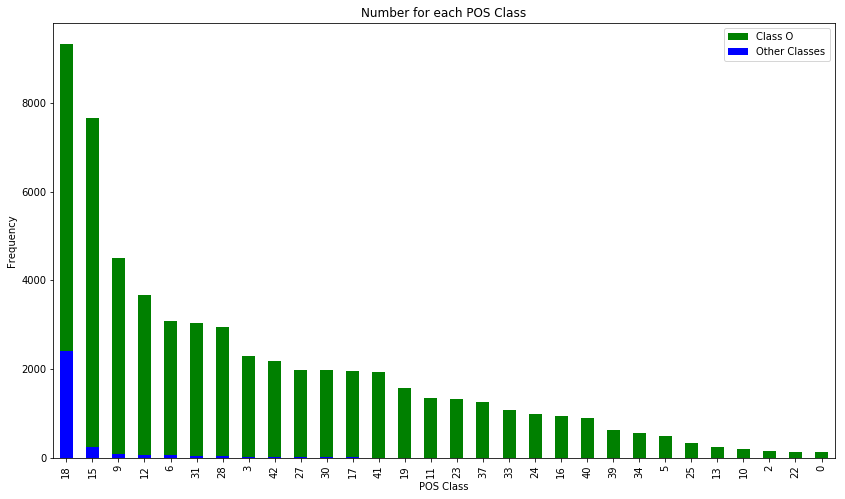

In [13]:
ax = df[df['label']=='O']['pos_class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each POS Class", color='g', label='Class O')
ax = df[df['label']!='O']['pos_class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each POS Class", color='b', label='Other Classes')
ax.set_xlabel("POS Class")
ax.set_ylabel("Frequency")
legend = ax.legend()

# Creating Feature and label dataframe

In [14]:
# Appling hot encoding on ortho vector
final_df = pd.get_dummies(df['orto_vector'].apply(pd.Series).stack()).sum(level=0)

final_df['pos_class'] = df['pos_class']
final_df['labels'] = df['labels']

#  

#  

#  

#  

# Solutions

## Method 1: Normal Classification


In [15]:
def model(df):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('labels', axis=1),df['labels'],test_size=0.2)

    clf = svm.SVC(C=5, kernel='linear', gamma=0.05)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (16,16))
    sn.heatmap(cm, annot=True,  fmt='g')

accuracy 0.9500996412913512
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        46
           4       0.00      0.00      0.00       133
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        35
           8       0.95      1.00      0.97     11919
           9       0.00      0.00      0.00        32
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        57

    accuracy                           0.95     12545
   macro avg       0.07      0.08      0.07     12545
weighted avg       0.90      0.95      0.93     12545



/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


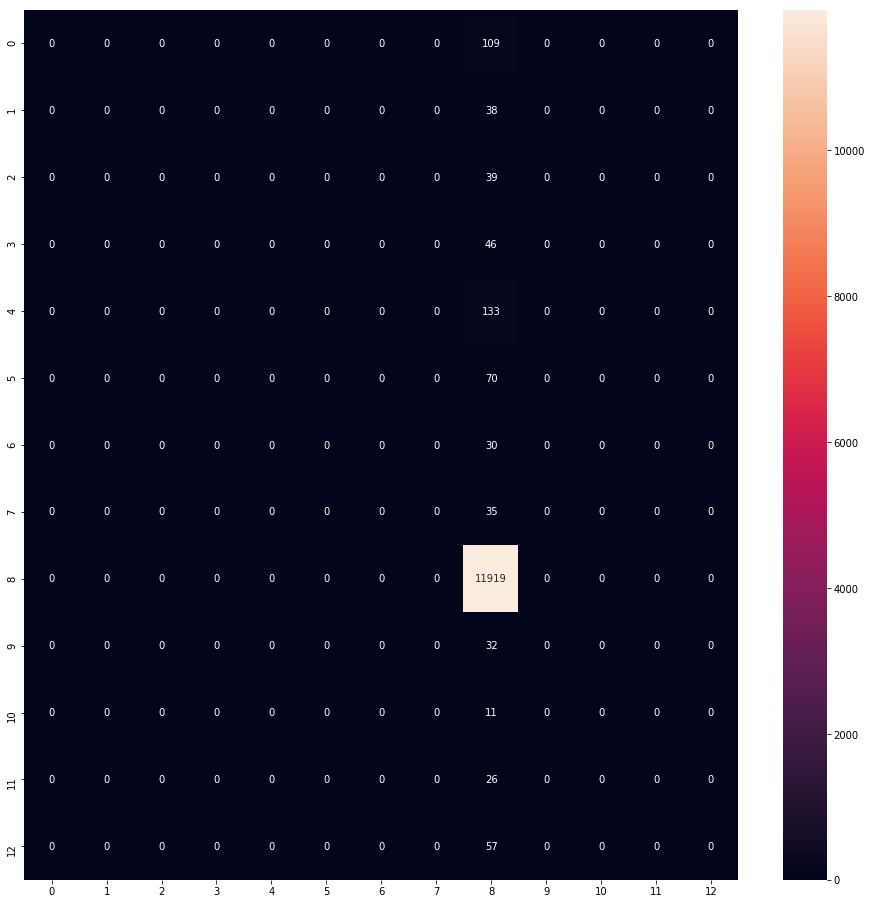

In [16]:
model(final_df)

#  

#  

#  

## Method 2: Downsampling

In [17]:
def mostFrequent(arr): 
  
    # Insert all elements in Hash. 
    n = len(arr)
    Hash = dict() 
    for i in range(n): 
        if arr[i] in Hash.keys(): 
            Hash[arr[i]] += 1
        else: 
            Hash[arr[i]] = 1
  
    # find the max frequency 
    max_count = 0
    res = -1
    for i in Hash:  
        if (max_count < Hash[i]):  
            res = i 
            max_count = Hash[i] 
          
    return res 

In [18]:
most_freq = mostFrequent(final_df.labels)
df_majority = final_df[final_df.labels==most_freq]
df_minority = final_df[final_df.labels!=most_freq]



df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.labels.value_counts().sum(),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.labels.value_counts()

8     3160
4      660
0      548
5      335
3      264
12     245
6      221
1      206
2      203
9      150
7      142
11     140
10      46
Name: labels, dtype: int64

accuracy 0.5063291139240507
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00       133
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00        46
           7       0.00      0.00      0.00        40
           8       0.51      1.00      0.67       640
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        29
          12       0.00      0.00      0.00        53

    accuracy                           0.51      1264
   macro avg       0.04      0.08      0.05      1264
weighted avg       0.26      0.51      0.34      1264



/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


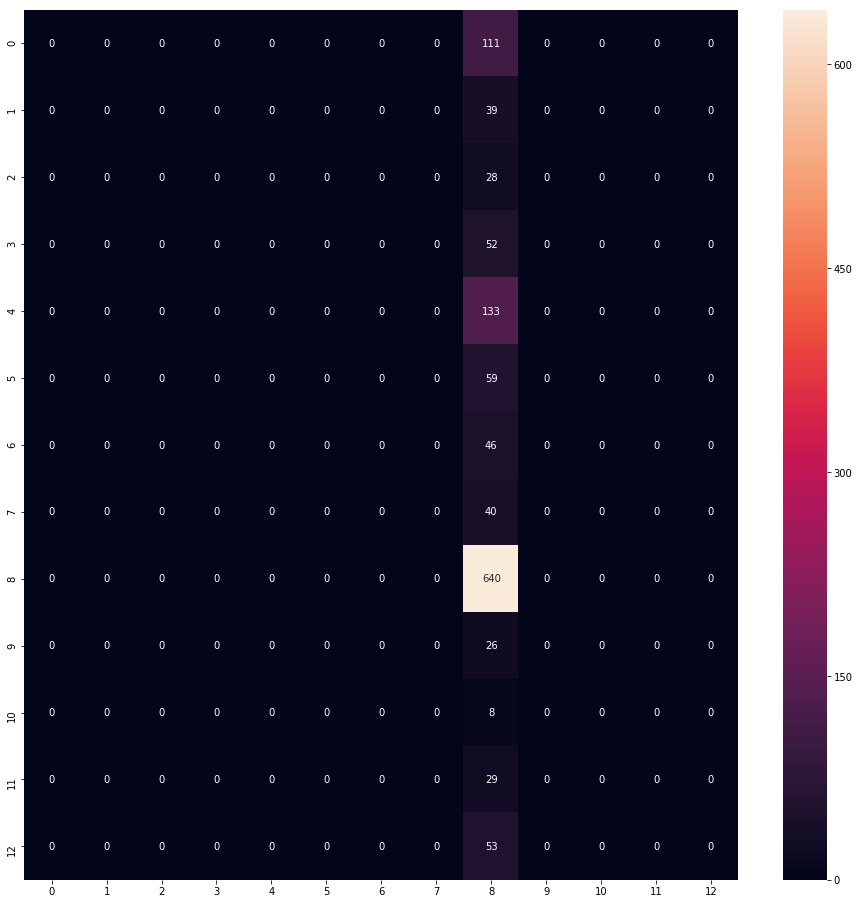

In [19]:
model(df_downsampled)

#  

#  

#  

## Method 3: Upsampling

In [20]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.labels.value_counts().sum(),    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.labels.value_counts()

8     59565
4     12484
0     10447
5      6269
3      4936
12     4544
6      4180
2      3898
1      3860
9      2770
11     2676
7      2674
10      827
Name: labels, dtype: int64

In [21]:
def nb_model(df):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('labels', axis=1),df['labels'],test_size=0.2)
    
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (16,16))
    sn.heatmap(cm, annot=True,  fmt='g')

accuracy 0.49177369260471754
              precision    recall  f1-score   support

           0       0.24      0.09      0.13      2055
           1       0.00      0.00      0.00       795
           2       0.08      0.07      0.07       732
           3       0.11      0.08      0.09       954
           4       0.11      0.06      0.07      2478
           5       0.00      0.00      0.00      1175
           6       0.00      0.00      0.00       814
           7       0.00      0.00      0.00       563
           8       0.55      0.93      0.69     12084
           9       0.00      0.00      0.00       549
          10       0.00      0.00      0.00       149
          11       0.00      0.00      0.00       517
          12       0.00      0.00      0.00       961

    accuracy                           0.49     23826
   macro avg       0.08      0.09      0.08     23826
weighted avg       0.32      0.49      0.38     23826



/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


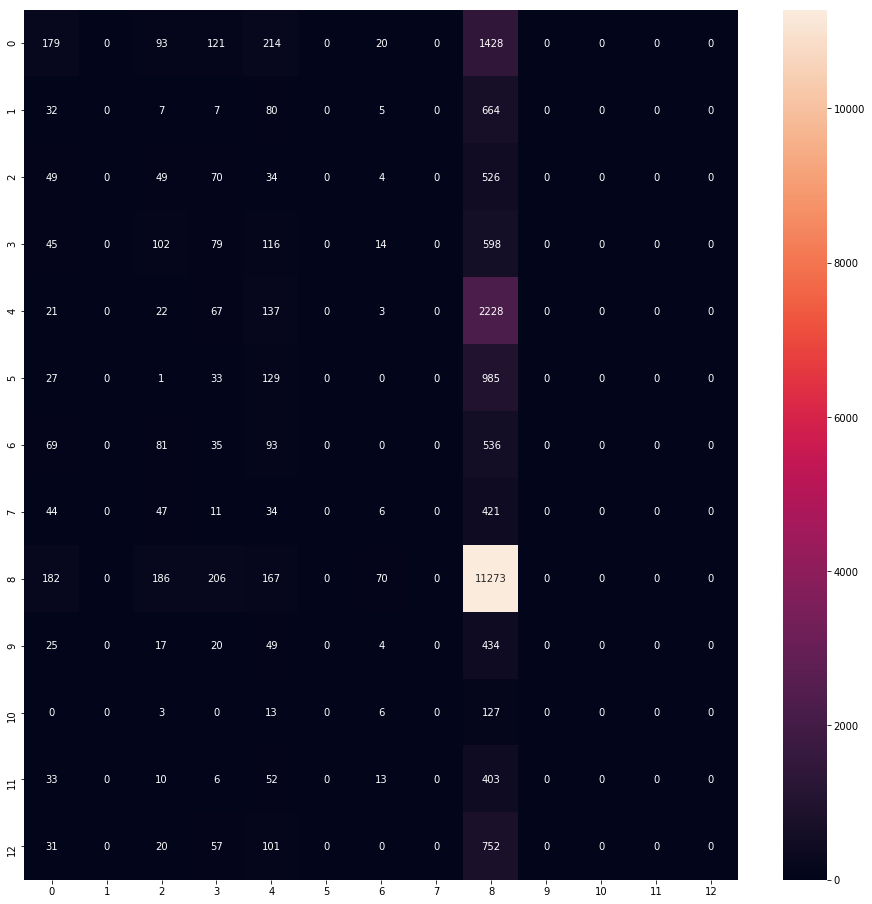

In [22]:
nb_model(df_upsampled)

## Method 4: Penalizing

In [23]:
def model_penalize(df):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('labels', axis=1),df['labels'],test_size=0.2)

    clf = svm.SVC(C=5, kernel='linear', class_weight='balanced', gamma=0.05)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (16,16))
    sn.heatmap(cm, annot=True,  fmt='g')

In [24]:
# model_penalize(final_df)

#  

#  

## Method 5: Random Forest

In [25]:
def rf_model(df):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('labels', axis=1),df['labels'],test_size=0.2)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (16,16))
    sn.heatmap(cm, annot=True,  fmt='g')

accuracy 0.9498605021921084
              precision    recall  f1-score   support

           0       0.33      0.01      0.02        96
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00       127
           5       0.00      0.00      0.00        74
           6       0.50      0.11      0.18        47
           7       0.00      0.00      0.00        25
           8       0.95      1.00      0.97     11918
           9       0.00      0.00      0.00        36
          10       0.00      0.00      0.00         9
          11       1.00      0.05      0.09        22
          12       0.00      0.00      0.00        53

    accuracy                           0.95     12545
   macro avg       0.21      0.09      0.10     12545
weighted avg       0.91      0.95      0.93     12545



/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


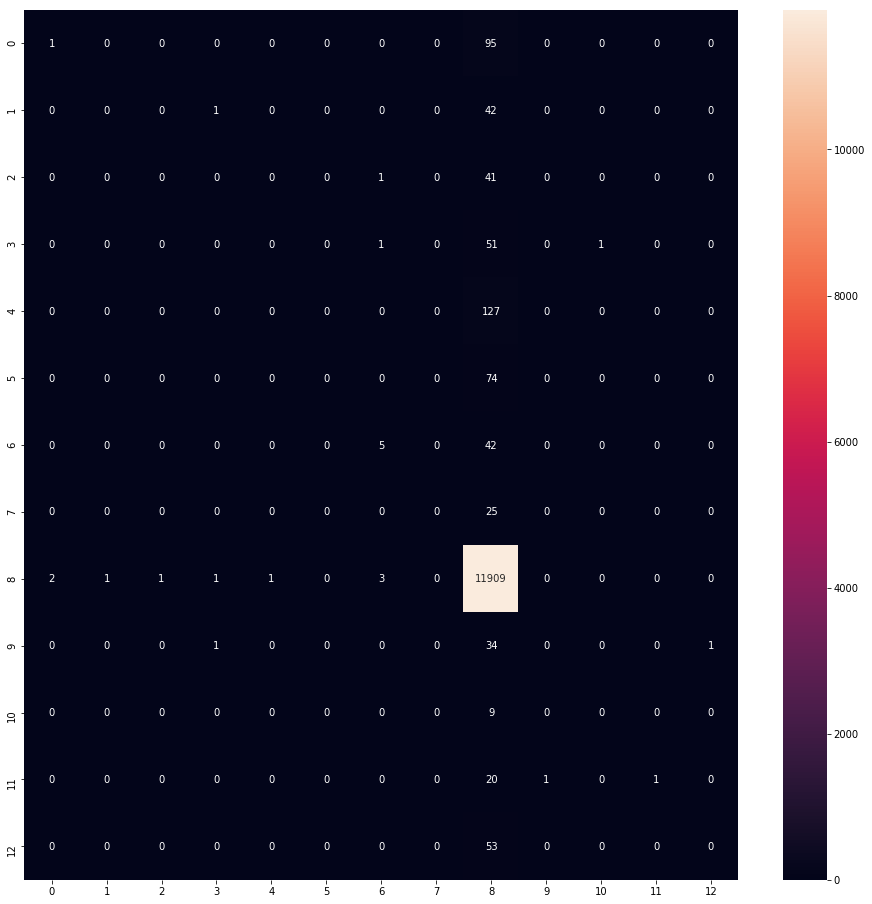

In [26]:
rf_model(final_df)

#  

#  

### All of this have many false negatives! It's very difficult to classify classes whose label is not 'O'

## Method 6: Reading the text as tweets and using a neural network

In [27]:
def read_file_as_lists(filename, delimiter='\t'):
    with open(filename) as stream:
        reader = csv.reader(stream, delimiter=delimiter, quoting=csv.QUOTE_NONE)
        labeled_tokens = [zip(*g) for k, g in groupby(reader, lambda x: not [s for s in x if s.strip()]) if not k]
        tokens, labels = zip(*labeled_tokens)
        return [list(t) for t in tokens], [list(l) for l in labels]

In [28]:
tweets, labels = read_file_as_lists('train.txt')
tweets_train, tweets_test, labels_train, labels_test = model_selection.train_test_split(tweets,labels,test_size=0.2)

In [29]:
def flatten(l):
    return [i for sublist in l for i in sublist]

def vectorize_labels(labels, index2label=None):
    """labels: list of lists, i.e. each tweet has a list of labels"""
    flat_labels = flatten(labels)
    if not index2label:
        label_set = list(set(flat_labels))
        index2label = dict(enumerate(label_set))
    label2index = dict((l, i) for i, l in enumerate(index2label))

    y = [label2index[l] for l in flat_labels]
    y = to_categorical(np.array(y, dtype='int32'))
    return y, label2index, index2label

In [30]:
window = 1
index2label_cat = [
    'B-corporation',
    'B-creative-work',
    'B-group',
    'B-location',
    'B-person',
    'B-product',
    'I-corporation',
    'I-creative-work',
    'I-group',
    'I-location',
    'I-person',
    'I-product',
    'O'
]

# Creating a new list for changing label to integer classes
y_cat_train, label2index_cat, _ = vectorize_labels(labels_train, index2label_cat)

In [31]:
# Mapping the labels to binary
def map_to_binary(labels):
    return [['TRUE' if label != 'O' else 'FALSE' for label in lbls] for lbls in labels]
    
labels_seg_train = map_to_binary(labels_train)

index2label_seg = ['FALSE', 'TRUE']
label2index_seg = { l:i for i, l in enumerate(index2label_seg) }

lb = LabelBinarizer()
y_seg_train = lb.fit_transform(flatten(labels_seg_train))

### Feature 1: Ortho Vector

In [32]:
def orthoencoding(ortho2index, tweets_train):
    ortho_mapping = flatten(orthographic_mapping(tweets_train))
    x_ortho_twitter_train = padding([0]*20, ortho2index, ortho_mapping)
    return x_ortho_twitter_train

In [33]:
x_ortho_twitter_train = orthoencoding(ortho2index, tweets_train)

### Feature 2: Pos Tag

In [34]:
def pos_fun(tweets_train):
    temp_list = []
    for items in tweets_train:
        for item in items:
            temp_list.append(item)
    temp_df = pd.DataFrame(temp_list)
    pos_tags = pos_tag(temp_df[0].astype(str))
    pos = []
    for item in pos_tags:
        if item[0][0] == '@':
            pos.append('@')
        else:
            pos.append(item[1])
    pos_set = (set(pos))
    pos_hash = {k: v for v, k in enumerate(list(pos_set))}
    x_postag = [pos_hash[item] for item in pos]
    return pos_set, pos_hash, x_postag

In [35]:
pos_set, pos_hash, x_postag_train = pos_fun(tweets_train)
index2postag = list(pos_set)

### Neural Network -- Character Representation

In [36]:
def get_input_layer(shape, name):
    return Input(shape=shape, dtype='int32', name='{}_input'.format(name))
    
def rand_uniform_embedding_layer(input_layer, input_dim, output_dim, input_len, name):
    uniform = RandomUniform(seed=seed_number, 
                            minval=-np.sqrt(3/output_dim),
                            maxval= np.sqrt(3/output_dim))
    embed_layer = Embedding(input_dim=input_dim, 
                            output_dim=output_dim,
                            input_length=input_len, 
                            embeddings_initializer=uniform,
                            trainable=False,
                            name='{}_embed'.format(name))(input_layer)
    embed_layer = Dropout(0.5, name='{}_embed_dropout'.format(name))(embed_layer)
    return embed_layer

ortho_dim = 30
char_ortho_input = get_input_layer((ortho_max_length,), 'char_ortho')
char_ortho_embed = rand_uniform_embedding_layer(char_ortho_input, 
                                                len(index2ortho), 
                                                ortho_dim, 
                                                ortho_max_length, 
                                                'char_ortho')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### CNN Network

In [37]:
def get_char_cnn(embedded, name, filters=64, kernel_size=3, dense_units=32, convs=2):
    conv_net = embedded
    for _ in range(convs):
        conv_net = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(conv_net)
    conv_net = GlobalAveragePooling1D()(conv_net)
    conv_net = Dense(dense_units, activation='relu', name='{}_dense'.format(name))(conv_net)
    return conv_net

char_encoded = char_ortho_embed

char_encoded = get_char_cnn(char_encoded, 'char_encoded')
char_encoder = Model(inputs=[char_ortho_input], outputs=[char_encoded])
char_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
char_ortho_input (InputLayer (None, 20)                0         
_________________________________________________________________
char_ortho_embed (Embedding) (None, 20, 30)            150       
_________________________________________________________________
char_ortho_embed_dropout (Dr (None, 20, 30)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 64)            5824      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 64)            12352     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
char_encoded_dense (Dense)   (None, 32)                2080      
Total para

### Neural Network -- Word Representation

In [38]:
postag_dim = 100
postag_input = get_input_layer((window*1,), 'word_postag')
postag_embed = rand_uniform_embedding_layer(postag_input, 
                                            len(index2postag)+1, 
                                            postag_dim,
                                            window*1, 
                                            'word_postag')

#### BLSTM Network

In [39]:
word_encoded = postag_embed
word_encoded = Bidirectional(LSTM(100, 
                                  return_sequences=False, 
                                  dropout=0.2, 
                                  recurrent_dropout=0.2), 
                             name='word_encoded_blstm')(word_encoded)
word_encoded = Dropout(0.5, name='word_encoded_blstm_dropout')(word_encoded)
word_encoder = Model(inputs=[ 
                             postag_input, 
                             ], outputs=[word_encoded])
word_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_postag_input (InputLaye (None, 1)                 0         
_________________________________________________________________
word_postag_embed (Embedding (None, 1, 100)            4400      
_________________________________________________________________
word_postag_embed_dropout (D (None, 1, 100)            0         
_________________________________________________________________
word_encoded_blstm (Bidirect (None, 200)               160800    
_________________________________________________________________
word_encoded_blstm_dropout ( (None, 200)               0         
Total params: 165,200
Trainable params: 160,800
Non-trainable params: 4,400
_________________________________________________________________


#### Final Concatenation

In [40]:
network = concatenate([char_encoded, word_encoded], name='concat_layer')
network = Dense(100, activation='relu', name='common_dense_layer') (network)

seg_output = Dense(1, activation='sigmoid', name='seg_output')(network)
cat_output = Dense(len(index2label_cat), activation='softmax', name='cat_output')(network)

word_inputs = [postag_input]
char_inputs = [char_ortho_input]

model = Model(inputs= char_inputs + word_inputs, 
              outputs=[seg_output, cat_output], 
              name='ne_model')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_ortho_input (InputLayer)   (None, 20)           0                                            
__________________________________________________________________________________________________
char_ortho_embed (Embedding)    (None, 20, 30)       150         char_ortho_input[0][0]           
__________________________________________________________________________________________________
char_ortho_embed_dropout (Dropo (None, 20, 30)       0           char_ortho_embed[0][0]           
__________________________________________________________________________________________________
word_postag_input (InputLayer)  (None, 1)            0                                            
__________________________________________________________________________________________________
conv1d_1 (

In [41]:
def fbeta_score(y_true, y_pred, beta=1):
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Weight precision and recall together as a single scalar.
    beta2 = beta ** 2
    f_score = (1 + beta2) * (precision * recall) / (beta2 * precision + recall)
    return f_score

### Training the model

In [42]:
adamax = Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adamax,
              loss={'seg_output': 'binary_crossentropy', 
                    'cat_output': 'categorical_crossentropy'},
              loss_weights={'seg_output': 1., 
                            'cat_output': 1.},
              metrics={'seg_output': [fbeta_score, 'accuracy'],
                       'cat_output': [fbeta_score, 'accuracy']})

early_stopping = EarlyStopping(patience=20, verbose=1)
# checkpointer = ModelCheckpoint(filepath='{}weights/{}.hdf5'.format(WEIGHTS_DIR, experiment),
#                                save_best_only=True, verbose=1)

train_word_values = [x_postag_train]
train_char_values = [x_ortho_twitter_train]

hist = model.fit(train_char_values + train_word_values, 
                 {'seg_output': y_seg_train, 'cat_output': y_cat_train}, 
                 batch_size=500, 
                 epochs=20, 
                 verbose=1, 
                 shuffle=True,
                 validation_split=0.2,
                 callbacks=[early_stopping])  # , checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 40281 samples, validate on 10071 samples
Epoch 1/20
40281/40281 [==============================] - 8s 208us/step - loss: 1.1064 - seg_output_loss: 0.2938 - cat_output_loss: 0.8126 - seg_output_fbeta_score: nan - seg_output_acc: 0.9488 - cat_output_fbeta_score: nan - cat_output_acc: 0.8939 - val_loss: 0.5000 - val_seg_output_loss: 0.1842 - val_cat_output_loss: 0.3158 - val_seg_output_fbeta_score: nan - val_seg_output_acc: 0.9500 - val_cat_output_fbeta_score: 0.9493 - val_cat_output_acc: 0.9500
Epoch 2/20
40281/40281 [==============================] - 6s 145us/step - loss: 0.4562 - seg_output_loss: 0.1672 - cat_output_loss: 0.2890 - seg_output_fbeta_score: nan - seg_output_acc: 0.9493 - cat_output_fbeta_score: 0.9491 - cat_output_acc: 0.9493 - val_loss: 0.4325 - val_seg_output_loss: 0.1563 - val_cat_output_loss: 0.2762 - val_seg_output_fbeta_score: nan - val_seg_output_acc: 0.9499 - val_cat_output_fbeta_score: 0.9489 - val_cat_outp

40281/40281 [==============================] - 6s 147us/step - loss: 0.3989 - seg_output_loss: 0.1429 - cat_output_loss: 0.2560 - seg_output_fbeta_score: nan - seg_output_acc: 0.9491 - cat_output_fbeta_score: 0.9491 - cat_output_acc: 0.9493 - val_loss: 0.4141 - val_seg_output_loss: 0.1485 - val_cat_output_loss: 0.2656 - val_seg_output_fbeta_score: nan - val_seg_output_acc: 0.9496 - val_cat_output_fbeta_score: 0.9482 - val_cat_output_acc: 0.9500
Epoch 19/20
40281/40281 [==============================] - 6s 143us/step - loss: 0.4005 - seg_output_loss: 0.1438 - cat_output_loss: 0.2567 - seg_output_fbeta_score: nan - seg_output_acc: 0.9493 - cat_output_fbeta_score: 0.9492 - cat_output_acc: 0.9493 - val_loss: 0.4075 - val_seg_output_loss: 0.1465 - val_cat_output_loss: 0.2610 - val_seg_output_fbeta_score: nan - val_seg_output_acc: 0.9499 - val_cat_output_fbeta_score: 0.9488 - val_cat_output_acc: 0.9500
Epoch 20/20
40281/40281 [==============================] - 6s 155us/step - loss: 0.3977 - 

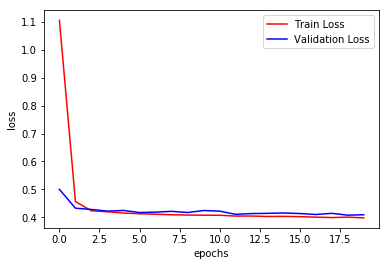

In [43]:
train_loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
plt.plot(range(len(train_loss)), train_loss, color="red", label="Train Loss")
plt.plot(range(len(train_loss)), val_loss, color="blue", label="Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="best")
plt.show()

In [44]:
cat_model = Model(inputs= char_inputs + word_inputs, 
                  outputs=[cat_output], 
                  name='cat_model')

### Testing the model

In [45]:
pos_set, pos_hash, x_postag_test = pos_fun(tweets_test)
x_ortho_twitter_test = orthoencoding(ortho2index, tweets_test)

In [46]:
def decode_predictions(predictions, idx2label):
    return [idx2label[pred] for pred in predictions]

In [47]:
# Predicting test data
test_word_values = [x_postag_test]
test_char_values = [x_ortho_twitter_test]

prediction_probs = cat_model.predict(  
                                     test_char_values + 
                                     test_word_values, batch_size=500, verbose=1)
# Decoding predictions
decoded_predictions = decode_predictions([np.argmax(p) for p in prediction_probs], index2label_cat)

12378/12378 [==============================] - 1s 92us/step


Classification Report

                 precision    recall  f1-score   support

  B-corporation       0.00      0.00      0.00        40
B-creative-work       0.00      0.00      0.00        22
        B-group       0.00      0.00      0.00        45
     B-location       0.00      0.00      0.00       110
       B-person       0.00      0.00      0.00       134
      B-product       0.00      0.00      0.00        33
  I-corporation       0.00      0.00      0.00         9
I-creative-work       0.00      0.00      0.00        27
        I-group       0.00      0.00      0.00        30
     I-location       0.00      0.00      0.00        46
       I-person       0.00      0.00      0.00        68
      I-product       0.00      0.00      0.00        51
              O       0.95      1.00      0.97     11763

       accuracy                           0.95     12378
      macro avg       0.07      0.08      0.07     12378
   weighted avg       0.90      0.95      0.93     12378



Con

/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


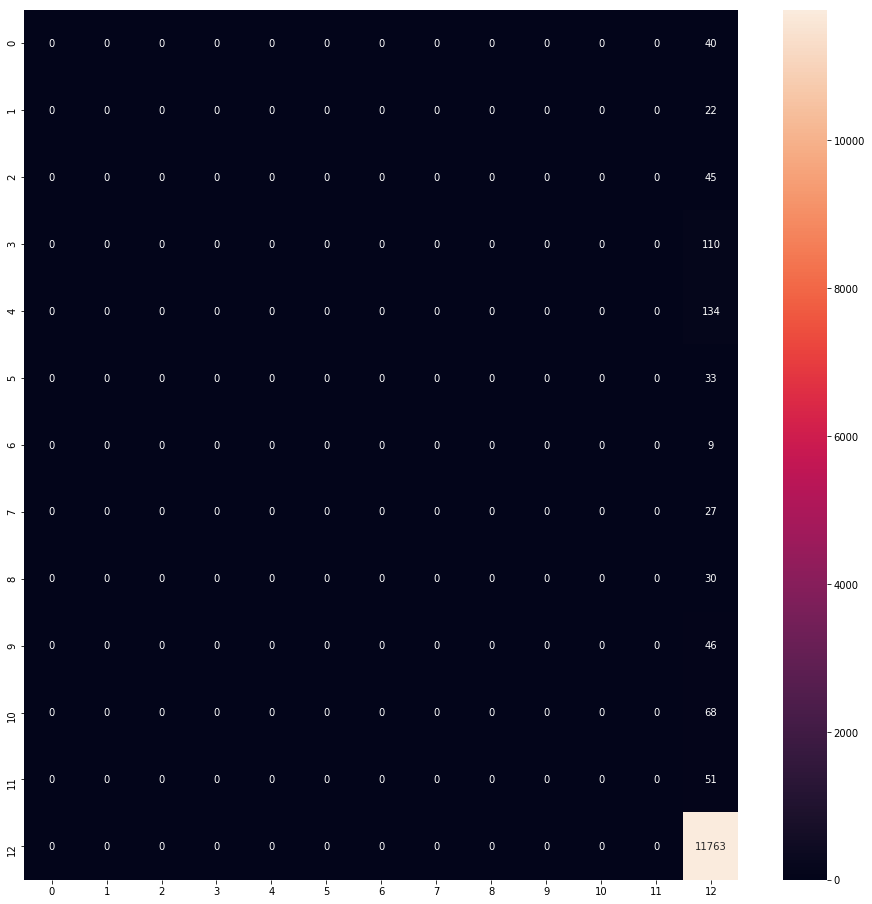

In [48]:
print("Classification Report\n")
print(classification_report(flatten(labels_test), decoded_predictions))
print()
print()
print("Confusion Matrix\n")
cm = confusion_matrix(flatten(labels_test), decoded_predictions)
plt.figure(figsize = (16,16))
sn.heatmap(cm, annot=True,  fmt='g')

## CRF-Suite Predictions

In [49]:
nn_model = Model(inputs=model.input, outputs=model.get_layer('common_dense_layer').output)

def get_xseq(model, matrix):
    xseq = [{'feat{}'.format(i):float(w) for i,w in enumerate(list(features))} 
            for features 
            in model.predict(matrix)]
    return ItemSequence(xseq)

xseq_train = get_xseq(nn_model,  train_char_values + train_word_values)
yseq_train = flatten(labels_train)

trainer = crf.Trainer(verbose=False)
trainer.append(xseq_train, yseq_train)
trainer.set_params({
    'c1': 1.0,                           # L1 penalty
    'c2': 1e-3,                          # L2 penalty
    'max_iterations': 20,               # stop earlier
    'feature.possible_transitions': True # possible transitions, but not observed
})
trainer.train('{}.pycrfsuite'.format(experiment))
trainer.logparser.last_iteration

tagger = crf.Tagger()
tagger.open('{}.pycrfsuite'.format(experiment))

# Predicting test data
decoded_predictions = tagger.tag(get_xseq(nn_model, 
                                          test_char_values + 
                                          test_word_values))

In [55]:
info = tagger.info()

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(info.transitions).most_common(15))

print("\nTop unlikely transitions:")
print_transitions(Counter(info.transitions).most_common()[-15:])

Top likely transitions:
B-person -> I-person 3.936851
B-location -> I-location 2.291192
I-product -> I-product 1.705511
O      -> O       1.632621
B-creative-work -> I-creative-work 1.417550
I-creative-work -> I-creative-work 1.386468
B-group -> I-group 1.333125
B-product -> I-product 1.057185
I-location -> I-location 0.951327
I-group -> I-group 0.726022
O      -> B-person 0.531396
B-corporation -> I-corporation 0.516798
O      -> B-location 0.494253
O      -> B-group 0.371175
O      -> B-corporation 0.290107

Top unlikely transitions:
B-location -> B-person -0.140064
B-person -> B-location -0.142025
B-group -> O       -0.152444
B-person -> B-person -0.153057
I-group -> O       -0.157578
I-creative-work -> O       -0.238135
I-product -> O       -0.587993
B-product -> O       -0.602447
B-creative-work -> O       -1.781312
O      -> I-corporation -2.033485
O      -> I-group -2.725038
O      -> I-product -3.081457
O      -> I-creative-work -3.115185
O      -> I-location -3.260909
O      -

Classification Report

                 precision    recall  f1-score   support

  B-corporation       0.00      0.00      0.00        40
B-creative-work       0.00      0.00      0.00        22
        B-group       0.00      0.00      0.00        45
     B-location       0.00      0.00      0.00       110
       B-person       0.00      0.00      0.00       134
      B-product       0.00      0.00      0.00        33
  I-corporation       0.00      0.00      0.00         9
I-creative-work       0.00      0.00      0.00        27
        I-group       0.00      0.00      0.00        30
     I-location       0.00      0.00      0.00        46
       I-person       0.00      0.00      0.00        68
      I-product       0.00      0.00      0.00        51
              O       0.95      1.00      0.97     11763

       accuracy                           0.95     12378
      macro avg       0.07      0.08      0.07     12378
   weighted avg       0.90      0.95      0.93     12378



Con

/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/devashish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


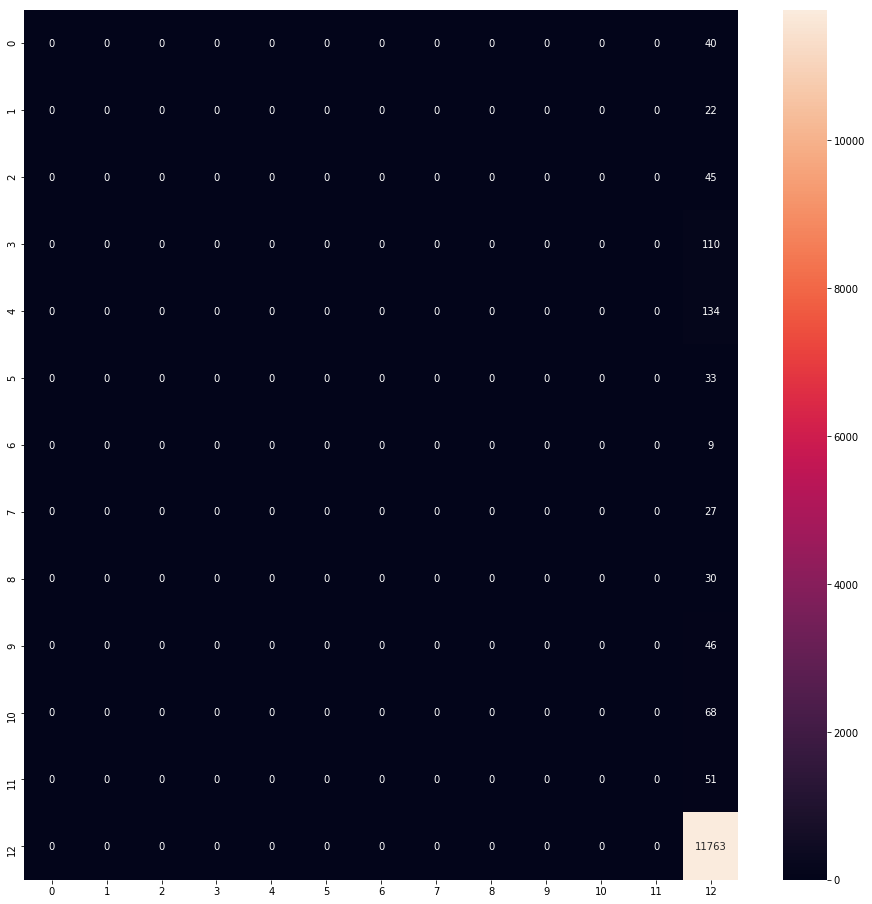

In [50]:
print("Classification Report\n")
print(classification_report(flatten(labels_test), decoded_predictions))
print()
print()
print("Confusion Matrix\n")
cm = confusion_matrix(flatten(labels_test), decoded_predictions)
plt.figure(figsize = (16,16))
sn.heatmap(cm, annot=True,  fmt='g')

## Training the final model

In [51]:
tweets_train, labels_train = tweets, labels

window = 1

y_cat_train, label2index_cat, _ = vectorize_labels(labels_train, index2label_cat)

x_ortho_twitter_train = orthoencoding(ortho2index, tweets_train)

labels_seg_train = map_to_binary(labels_train)

index2label_seg = ['FALSE', 'TRUE']
label2index_seg = { l:i for i, l in enumerate(index2label_seg) }

lb = LabelBinarizer()
y_seg_train = lb.fit_transform(flatten(labels_seg_train))

pos_set, pos_hash, x_postag_train = pos_fun(tweets_train)

index2postag = list(pos_set)

ortho_dim = 30
char_ortho_input = get_input_layer((ortho_max_length,), 'char_ortho')
char_ortho_embed = rand_uniform_embedding_layer(char_ortho_input, 
                                                len(index2ortho), 
                                                ortho_dim, 
                                                ortho_max_length, 
                                                'char_ortho')

char_encoded = char_ortho_embed

char_encoded = get_char_cnn(char_encoded, 'char_encoded')
char_encoder = Model(inputs=[char_ortho_input], outputs=[char_encoded])
char_encoder.summary()

postag_dim = 100
postag_input = get_input_layer((window*1,), 'word_postag')
postag_embed = rand_uniform_embedding_layer(postag_input, 
                                            len(index2postag)+1, 
                                            postag_dim,
                                            window*1, 
                                            'word_postag')

word_encoded = postag_embed
word_encoded = Bidirectional(LSTM(100, 
                                  return_sequences=False, 
                                  dropout=0.2, 
                                  recurrent_dropout=0.2), 
                             name='word_encoded_blstm')(word_encoded)
word_encoded = Dropout(0.5, name='word_encoded_blstm_dropout')(word_encoded)
word_encoder = Model(inputs=[ 
                             postag_input, 
                             ], outputs=[word_encoded])
word_encoder.summary()

network = concatenate([char_encoded, word_encoded], name='concat_layer')
network = Dense(100, activation='relu', name='common_dense_layer') (network)

network = concatenate([char_encoded, word_encoded], name='concat_layer')
network = Dense(100, activation='relu', name='common_dense_layer') (network)

seg_output = Dense(1, activation='sigmoid', name='seg_output')(network)
cat_output = Dense(len(index2label_cat), activation='softmax', name='cat_output')(network)

word_inputs = [postag_input]
char_inputs = [char_ortho_input]

model = Model(inputs=  char_inputs + word_inputs, 
              outputs=[seg_output, cat_output], 
              name='ne_model')
model.summary()

adamax = Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adamax,
              loss={'seg_output': 'binary_crossentropy', 
                    'cat_output': 'categorical_crossentropy'},
              loss_weights={'seg_output': 1., 
                            'cat_output': 1.},
              metrics={'seg_output': [fbeta_score, 'accuracy'],
                       'cat_output': [fbeta_score, 'accuracy']})

early_stopping = EarlyStopping(patience=20, verbose=1)
# checkpointer = ModelCheckpoint(filepath='{}weights/{}.hdf5'.format(WEIGHTS_DIR, experiment),
#                                save_best_only=True, verbose=1)

train_word_values = [x_postag_train]
train_char_values = [x_ortho_twitter_train]

hist = model.fit(train_char_values + train_word_values, 
                 {'seg_output': y_seg_train, 'cat_output': y_cat_train}, 
                 batch_size=500, 
                 epochs=20, 
                 verbose=1, 
                 shuffle=True,
                 validation_split=0.2,
                 callbacks=[early_stopping])  # , checkpointer])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
char_ortho_input (InputLayer (None, 20)                0         
_________________________________________________________________
char_ortho_embed (Embedding) (None, 20, 30)            150       
_________________________________________________________________
char_ortho_embed_dropout (Dr (None, 20, 30)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 18, 64)            5824      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 16, 64)            12352     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
char_encoded_dense (Dense)   (None, 32)                2080      
Total para

Epoch 6/20
50184/50184 [==============================] - 7s 135us/step - loss: 0.3886 - seg_output_loss: 0.1401 - cat_output_loss: 0.2485 - seg_output_fbeta_score: nan - seg_output_acc: 0.9520 - cat_output_fbeta_score: 0.9517 - cat_output_acc: 0.9519 - val_loss: 0.4827 - val_seg_output_loss: 0.1717 - val_cat_output_loss: 0.3110 - val_seg_output_fbeta_score: nan - val_seg_output_acc: 0.9404 - val_cat_output_fbeta_score: 0.9340 - val_cat_output_acc: 0.9404
Epoch 7/20
50184/50184 [==============================] - 8s 164us/step - loss: 0.3885 - seg_output_loss: 0.1400 - cat_output_loss: 0.2485 - seg_output_fbeta_score: nan - seg_output_acc: 0.9521 - cat_output_fbeta_score: 0.9517 - cat_output_acc: 0.9519 - val_loss: 0.4846 - val_seg_output_loss: 0.1724 - val_cat_output_loss: 0.3123 - val_seg_output_fbeta_score: nan - val_seg_output_acc: 0.9404 - val_cat_output_fbeta_score: 0.9340 - val_cat_output_acc: 0.9404
Epoch 8/20
50184/50184 [==============================] - 8s 164us/step - loss: 

## Predicting for the test.txt file

In [52]:
with open('test.txt') as stream:
    reader = csv.reader(stream, delimiter='\t', quoting=csv.QUOTE_NONE)
    labeled_tokens = [zip(*g) for k, g in groupby(reader, lambda x: not [s for s in x if s.strip()]) if not k]
    tokens,= zip(*labeled_tokens)
    tweets_test =  [list(t) for t in tokens]

pos_set, pos_hash, x_postag_test = pos_fun(tweets_test)

x_ortho_twitter_test = orthoencoding(ortho2index, tweets_test)

# Predicting test data
test_word_values = [x_postag_test]
test_char_values = [x_ortho_twitter_test]


prediction_probs = cat_model.predict(  
                                     test_char_values + 
                                     test_word_values, batch_size=500, verbose=1)
# Decoding predictions
decoded_predictions = decode_predictions([np.argmax(p) for p in prediction_probs], index2label_cat)

nn_model = Model(inputs=model.input, outputs=model.get_layer('common_dense_layer').output)

def get_xseq(model, matrix):
    xseq = [{'feat{}'.format(i):float(w) for i,w in enumerate(list(features))} 
            for features 
            in model.predict(matrix)]
    return ItemSequence(xseq)

xseq_train = get_xseq(nn_model,  train_char_values + train_word_values)
yseq_train = flatten(labels_train)

trainer = crf.Trainer(verbose=False)
trainer.append(xseq_train, yseq_train)
trainer.set_params({
    'c1': 1.0,                           # L1 penalty
    'c2': 1e-3,                          # L2 penalty
    'max_iterations': 20,               # stop earlier
    'feature.possible_transitions': True # possible transitions, but not observed
})
trainer.train('{}.pycrfsuite'.format(experiment))
trainer.logparser.last_iteration

tagger = crf.Tagger()
tagger.open('{}.pycrfsuite'.format(experiment))

# Predicting test data
decoded_predictions = tagger.tag(get_xseq(nn_model, 
                                          test_char_values + 
                                          test_word_values))

def save_final_predictions(filename, tweets, predictions):
    """save a file with token and its prediction in each row"""
    dataset, i = [], 0
    for n, tweet in enumerate(tweets):
        tweet_data = list(zip(tweet, predictions[i:i + len(tweet)]))
        i += len(tweet)
        dataset += tweet_data + [()]
    write_file(filename, dataset)
    
def write_file(filename, dataset, delimiter='\t'):
    """dataset is a list of tweets where each token can be a tuple of n elements"""
    with open(filename, '+w') as stream:
        writer = csv.writer(stream, delimiter=delimiter, quoting=csv.QUOTE_NONE, quotechar='')
        for tweet in dataset:
            writer.writerow(list(tweet))

save_final_predictions('output.txt', tweets_test, decoded_predictions)

23394/23394 [==============================] - 1s 37us/step


### Plotting the ouputs 


Text(0,0.5,'Frequency')

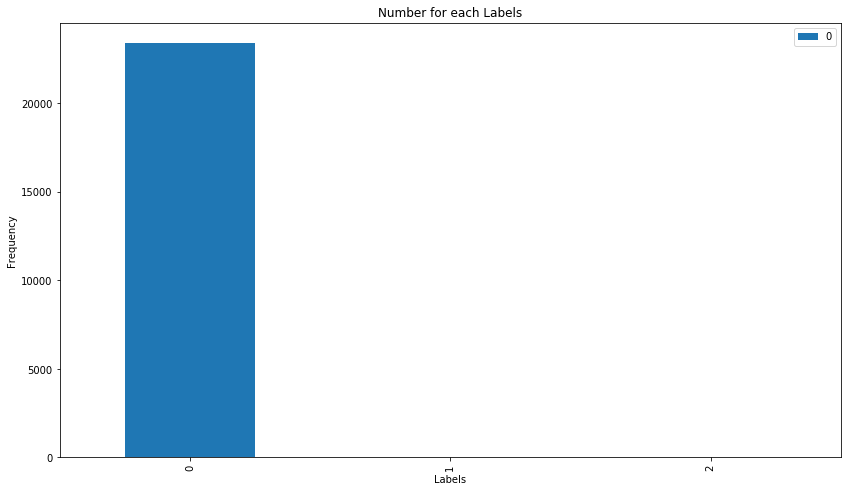

In [114]:
ax = pd.DataFrame(list(Counter(decoded_predictions).values())).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

# Bonus

Text(0,0.5,'Frequency')

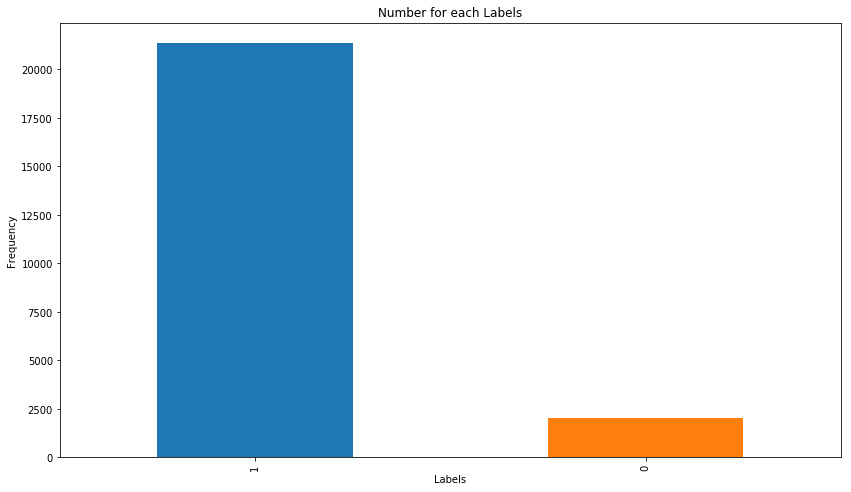

In [54]:
predi_df = pd.DataFrame(prediction_probs)
predi_df['max'] = predi_df.max(axis=1)

kmeans = KMeans(n_clusters=2, random_state=0).fit(predi_df['max'].to_frame())

predi_df['cluster'] = kmeans.labels_
predi_df['cluster'] = abs(1-predi_df['cluster'])

output_df = pd.read_csv('output.txt', sep='\t', header=None, quoting=csv.QUOTE_NONE)
output_df['Confidence'] = predi_df['cluster'] 

output_df.to_csv('bonus.txt', header=None, index=None, sep='\t', mode='a', quoting=csv.QUOTE_NONE)

ax = output_df['Confidence'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")